In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import json
data = pd.read_json('user-wallet-transactions.json')

In [151]:
data.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [152]:
data.shape

(100000, 13)

In [153]:
data.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

In [154]:
data.applymap

<bound method DataFrame.applymap of                                         _id  \
0      {'$oid': '681d38fed63812d4655f571a'}   
1      {'$oid': '681aa70dd6df53021cc6f3c0'}   
2      {'$oid': '681d04c2d63812d4654c733e'}   
3      {'$oid': '681d133bd63812d46551b6ef'}   
4      {'$oid': '681899e4ba49fc91cf2f4454'}   
...                                     ...   
99995  {'$oid': '681c85447b724ae36a6df5c9'}   
99996  {'$oid': '681c8d5b7b724ae36a70c446'}   
99997  {'$oid': '681c8d5b7b724ae36a70c62f'}   
99998  {'$oid': '681c8d5b7b724ae36a70c752'}   
99999  {'$oid': '681c9855d63812d4652821e8'}   

                                       userWallet  network protocol  \
0      0x00000000001accfa9cef68cf5371a23025b6d4b6  polygon  aave_v2   
1      0x000000000051d07a4fb3bd10121a343d85818da6  polygon  aave_v2   
2      0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
3      0x000000000096026fb41fc39f9875d164bd82e2dc  polygon  aave_v2   
4      0x0000000000e189dd664b9ab08a33c483995

In [ ]:

# Preprocess Timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Feature Engineering per userWallet
grouped = data.groupby('userWallet')

features = pd.DataFrame({
    'total_txns': grouped.size(),
    'deposit_count': grouped.apply(lambda x: (x['action'] == 'deposit').sum()),
    'borrow_count': grouped.apply(lambda x: (x['action'] == 'borrow').sum()),
    'repay_count': grouped.apply(lambda x: (x['action'] == 'repay').sum()),
    'redeem_count': grouped.apply(lambda x: (x['action'] == 'redeemunderlying').sum()),
    'liquidation_count': grouped.apply(lambda x: (x['action'] == 'liquidationcall').sum()),
    'active_days': grouped['timestamp'].apply(lambda x: (x.max() - x.min()).days + 1)
})

# Ratios (avoiding division by zero)
features['borrow_deposit_ratio'] = features['borrow_count'] / (features['deposit_count'] + 1)
features['repay_borrow_ratio'] = features['repay_count'] / (features['borrow_count'] + 1)
features['redeem_deposit_ratio'] = features['redeem_count'] / (features['deposit_count'] + 1)

# Fill NA values with 0
features.fillna(0, inplace=True)

# Clustering Model (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
features['cluster'] = kmeans.fit_predict(features)

# Score Mapping based on cluster (you can customize these)
cluster_scores = {
    0: 800,  # Good
    1: 800,
    2: 500,
    3: 200,
    4: 500  # Bad
}

features['credit_score'] = features['cluster'].map(cluster_scores)

# Normalize scores between 0 and 1000
features['credit_score'] = (features['credit_score'] / max(cluster_scores.values())) * 1000

# Output Scores
features[['credit_score']].to_csv('wallet_credit_scores.csv')
features[['credit_score']].head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_22184\2968521852.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'deposit_count': grouped.apply(lambda x: (x['action'] == 'deposit').sum()),
C:\Users\DELL\AppData\Local\Temp\ipykernel_22184\2968521852.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'borrow_count': grouped.apply(lambda x: (x['action'] == 'borrow').sum()),
C:\Users\DELL\AppData\Local\Temp\ipykernel_22

,credit_score
userWallet,
0x00000000001accfa9cef68cf5371a23025b6d4b6,1000.0
0x000000000051d07a4fb3bd10121a343d85818da6,1000.0
0x000000000096026fb41fc39f9875d164bd82e2dc,1000.0
0x0000000000e189dd664b9ab08a33c4839953852c,625.0
0x0000000002032370b971dabd36d72f3e5a7bf1ee,625.0


In [156]:
data.shape

(100000, 13)

In [157]:
data.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

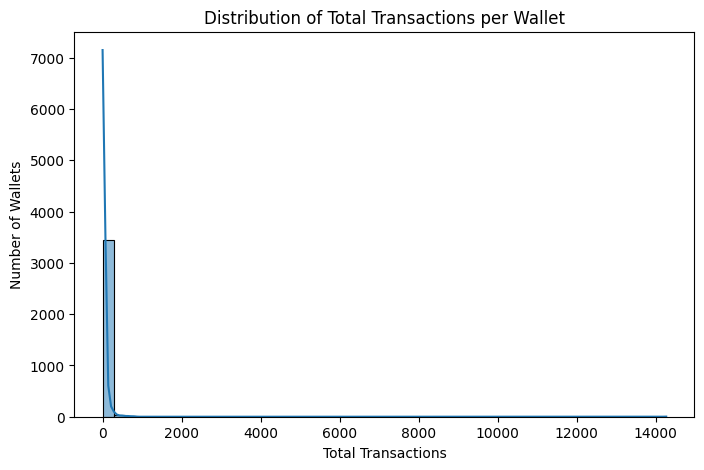

In [158]:
# Distribution of Total Transactions per Wallet
plt.figure(figsize=(8,5))
sns.histplot(features['total_txns'], bins=50, kde=True)
plt.title('Distribution of Total Transactions per Wallet')
plt.xlabel('Total Transactions')
plt.ylabel('Number of Wallets')
plt.show()


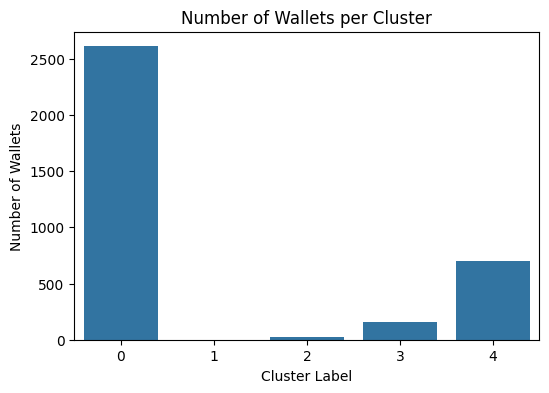

In [159]:
# Count of Wallets per Cluster (User Segments)

plt.figure(figsize=(6,4))
sns.countplot(x='cluster', data=features)
plt.title('Number of Wallets per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Wallets')
plt.show()


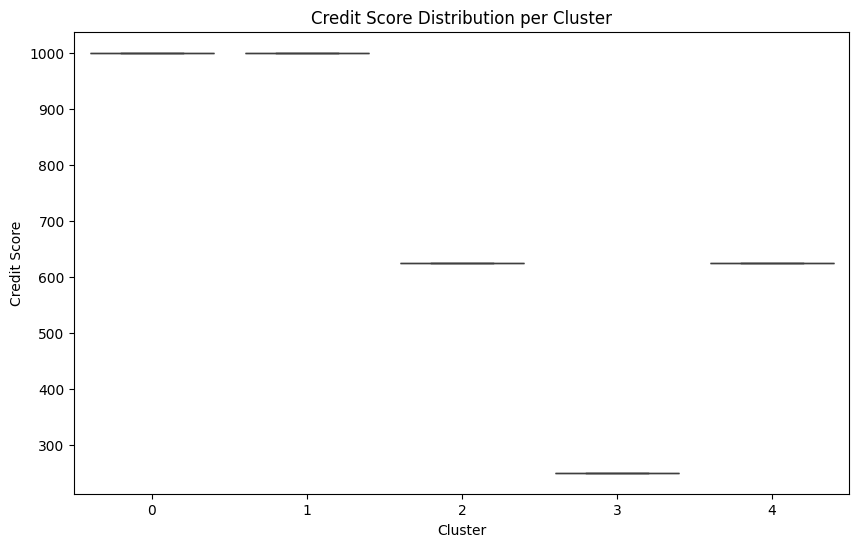

In [160]:
# Boxplot of Credit Scores by Cluster

plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='credit_score', data=features)
plt.title('Credit Score Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Credit Score')
plt.show()


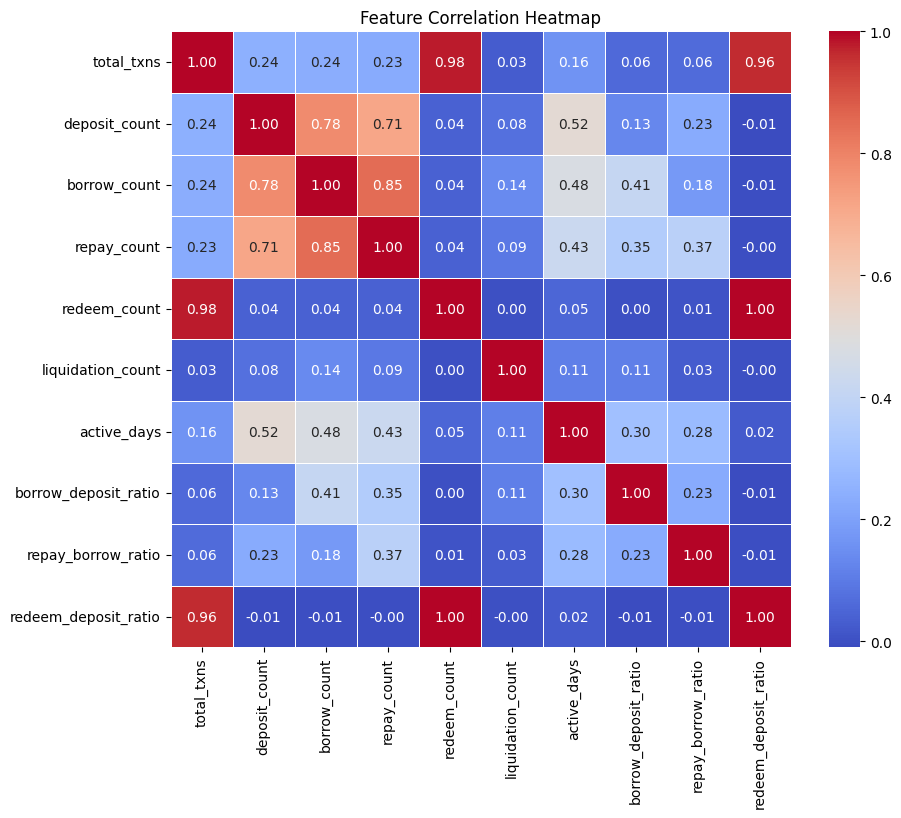

In [161]:

# 1️⃣ Select numerical features only (excluding cluster labels)
numeric_features = features.drop(columns=['cluster', 'credit_score'])

# 2️⃣ Compute correlation matrix
correlation_matrix = numeric_features.corr()

# 3️⃣ Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')  # Save as PNG
plt.show()


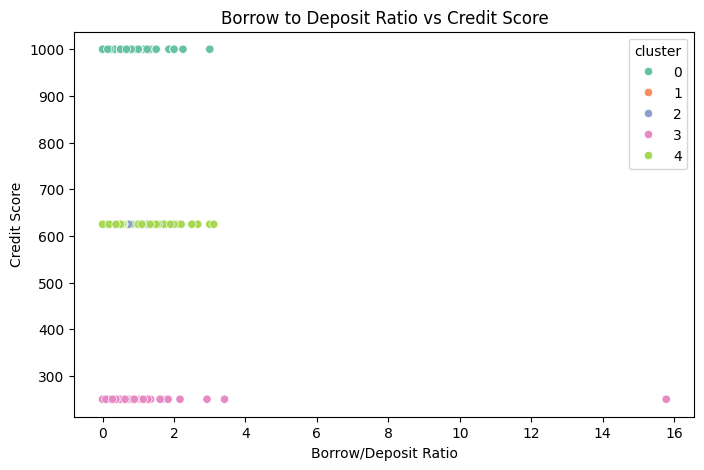

In [163]:
# Scatter Plot — Borrow/Deposit Ratio vs Credit Score

plt.figure(figsize=(8,5))
sns.scatterplot(x='borrow_deposit_ratio', y='credit_score', data=features, hue='cluster', palette='Set2')
plt.title('Borrow to Deposit Ratio vs Credit Score')
plt.xlabel('Borrow/Deposit Ratio')
plt.ylabel('Credit Score')
plt.show()
